In [134]:
import numpy as np
import pandas as pd

In [135]:
df = pd.read_csv("C:/Users/Admin/Desktop/JN/spam.csv", encoding='cp1252')

In [136]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3129,ham,Ok. But i finish at 6.,NaN,NaN,NaN
5136,ham,There are some nice pubs near here or there is...,NaN,NaN,NaN
1715,ham,Asking do u knw them or nt? May be ur frnds or...,NaN,NaN,NaN
2778,spam,For ur chance to win a å£250 cash every wk TXT...,NaN,NaN,NaN
650,ham,Thats cool! Sometimes slow and gentle. Sonetim...,NaN,NaN,NaN


In [137]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [138]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [139]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [140]:
df.sample(5)

,v1,v2
3079,ham,S.s:)i thinl role is like sachin.just standing...
1027,ham,Are you not around or just still asleep? :V
2716,ham,"House-Maid is the murderer, coz the man was mu..."
2733,ham,Do Ì_ noe if ben is going?
4680,ham,Are you staying in town ?


In [141]:
df.rename(columns={"v1":'target', 'v2':'text'}, inplace = True)

In [142]:
df.sample(5)

,target,text
5186,ham,I uploaded mine to Facebook
1416,ham,No..few hours before.went to hair cut .
602,ham,Speaking of does he have any cash yet?
120,spam,URGENT! Your Mobile No. was awarded å£2000 Bon...
3412,ham,Where do you need to go to get it?


In [143]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [144]:
df['target'] = encoder.fit_transform(df['target'])

In [145]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [146]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [147]:
df.duplicated().sum()

np.int64(403)

In [148]:
df = df.drop_duplicates(keep='first')

In [149]:
df.duplicated().sum()

np.int64(0)

In [150]:
df.shape

(5169, 2)

## 2.EDA

In [151]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

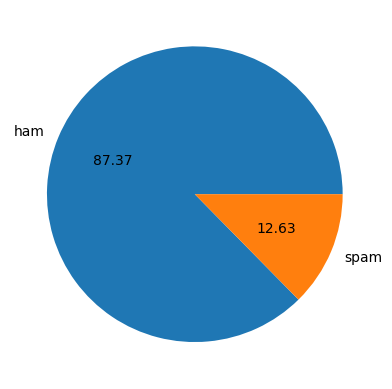

In [152]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [153]:
import nltk

In [154]:
nltk.download('punkt', download_dir='C:\\Users\\Admin\\Desktop\\JN\\nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\Desktop\JN\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
import nltk
nltk.data.path.append('C:\\Users\\Admin\\Desktop\\JN\\nltk_data')

In [156]:
df['num_characters']= df['text'].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4504\3630017924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']= df['text'].apply(len)


In [157]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [158]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [159]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


C:\Users\Admin\AppData\Local\Temp\ipykernel_4504\474503136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [160]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [161]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [162]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4504\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [163]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [165]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [166]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [167]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [168]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [169]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

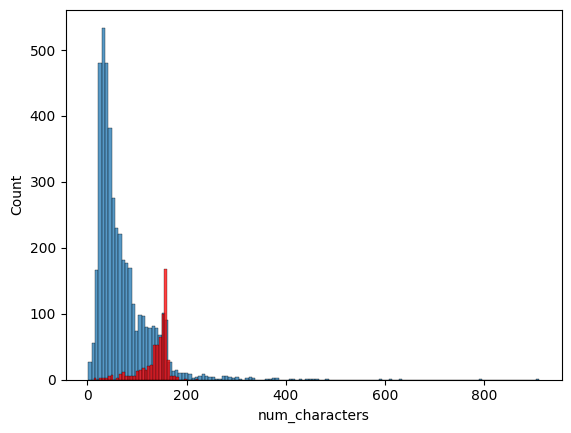

In [170]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

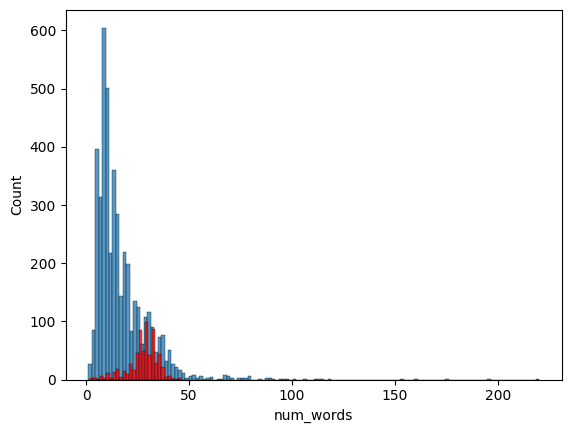

In [171]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

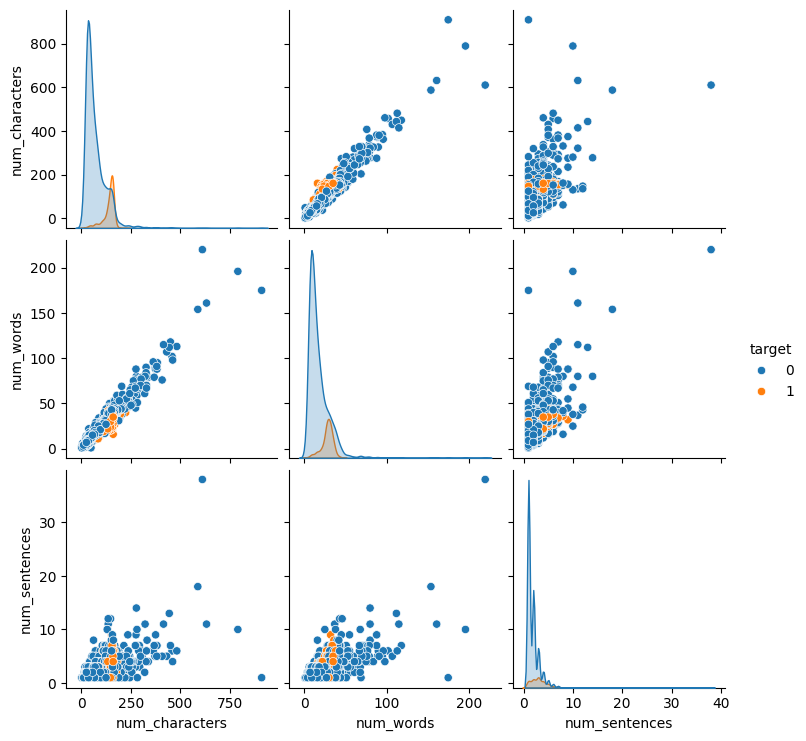

In [172]:
sns.pairplot(df, hue="target")

In [173]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


sns.heatmap(correlation_matrix, annot=True)

## 3.Data Preprocessing

In [174]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [175]:
nltk.download('stopwords', download_dir='C:\\Users\\Admin\\Desktop\\JN\\nltk_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\Desktop\JN\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
nltk.data.path.append('C:\\Users\\Admin\\Desktop\\JN\\nltk_data')


In [177]:
nltk.data.find('corpora/stopwords')

FileSystemPathPointer('C:\\Users\\Admin\\Desktop\\JN\\nltk_data\\corpora\\stopwords')

In [178]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [179]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [180]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [181]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("watching")

'watch'

In [182]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [183]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4504\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [184]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [185]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=350, min_font_size=10, background_color='black')


In [186]:
spam_wc = wc.generate(df[df['target'] == 1]["transformed_text"].str.cat(sep=" "))

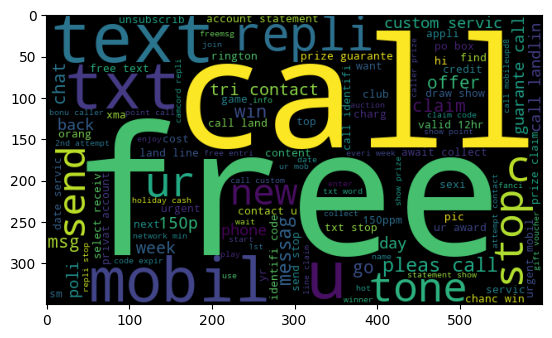

In [187]:
plt.imshow(spam_wc)

In [188]:
ham_wc = wc.generate(df[df['target'] == 0]["transformed_text"].str.cat(sep=" "))

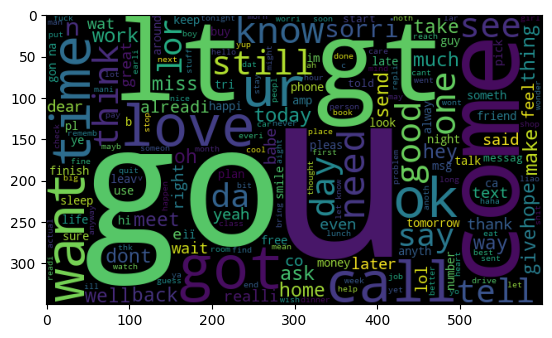

In [189]:
plt.imshow(ham_wc)

In [192]:
spam_corpus = []
for msg in df[df["target"] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [196]:
len(spam_corpus)

9939

In [194]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [197]:
len(ham_corpus)

35404

In [199]:
##from collections import Counter
##sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])  


## 4.model Building

In [352]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [353]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [354]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [355]:
#appending num character col to x
#X= np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [356]:
X.shape

(5169, 3000)

In [357]:
y = df['target'].values

In [358]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [361]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [362]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [363]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [364]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [365]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [366]:
# tfidf --- mnb


In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [368]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [369]:
clfs = {
    'svc' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'GBDT' : gbdt
}

In [370]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    return accuracy, precision

In [371]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, np.float64(0.9758006179927025))

In [372]:
# Initialize score lists
accuracy_scores = []
precision_scores = []

# Evaluate each classifier
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print('For ', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  svc
Accuracy -  0.9758220502901354
Precision -  0.9758006179927025
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9145667038984391
For  NB
Accuracy -  0.9709864603481625
Precision -  0.971926423835803
For  DT
Accuracy -  0.9294003868471954
Precision -  0.9251826491102858
For  LR
Accuracy -  0.9564796905222437
Precision -  0.957030999493168
For  RF
Accuracy -  0.97678916827853
Precision -  0.9767539330170272
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9498844801357744


In [373]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending = False)


In [374]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.976789,0.976754
0,svc,0.975822,0.975801
2,NB,0.970986,0.971926
4,LR,0.956480,0.957031
6,GBDT,0.950677,0.949884
3,DT,0.929400,0.925183
1,KN,0.905222,0.914567


In [375]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [376]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.976789
1,svc,Accuracy,0.975822
2,NB,Accuracy,0.970986
3,LR,Accuracy,0.956480
4,GBDT,Accuracy,0.950677
5,DT,Accuracy,0.929400
6,KN,Accuracy,0.905222
7,RF,Precision,0.976754
8,svc,Precision,0.975801
9,NB,Precision,0.971926


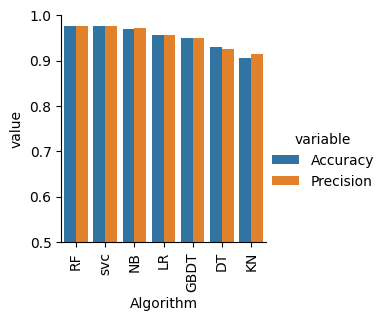

In [377]:
sns.catplot(x = 'Algorithm', y = 'value',
           hue = 'variable', data = performance_df1, kind = 'bar', height=3)
plt.ylim(0.5,1.0)
plt.xticks(rotation= 'vertical')
plt.show()

## improving the model

In [378]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})


In [379]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})


In [380]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [381]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [382]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.976789,0.976754,0.976789,0.976754,0.976789,0.976754
1,svc,0.975822,0.975801,0.975822,0.975801,0.975822,0.975801
2,NB,0.970986,0.971926,0.970986,0.971926,0.970986,0.971926
3,LR,0.956480,0.957031,0.956480,0.957031,0.956480,0.957031
4,GBDT,0.950677,0.949884,0.950677,0.949884,0.950677,0.949884
5,DT,0.929400,0.925183,0.929400,0.925183,0.929400,0.925183
6,KN,0.905222,0.914567,0.905222,0.914567,0.905222,0.914567


In [383]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [384]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
